# 1. Import Dependencies and Data

In [6]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import matplotlib.pyplot as plt

In [7]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
# Brining in tensorflow datasets for fashion mnist 
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Viz Data and Build Dataset

In [4]:
# Do some data transformation
import numpy as np

# 3. Build Neural Network

### 3.1 Import Modelling Components

In [5]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### 3.2 Build Generator

In [9]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=600))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    #Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
   # # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(3, 4, padding='same', activation='sigmoid'))
    
    return model

In [10]:
generator = build_generator()

In [8]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              3769472   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [17]:
img = generator.predict(np.random.randn(4,600,1))

1/1 [==============================] - 0s 308ms/step


In [18]:
generator.predict(np.random.randn(4,600,1)).shape

1/1 [==============================] - 0s 59ms/step


(4, 28, 28, 3)

1/1 [==============================] - 0s 49ms/step


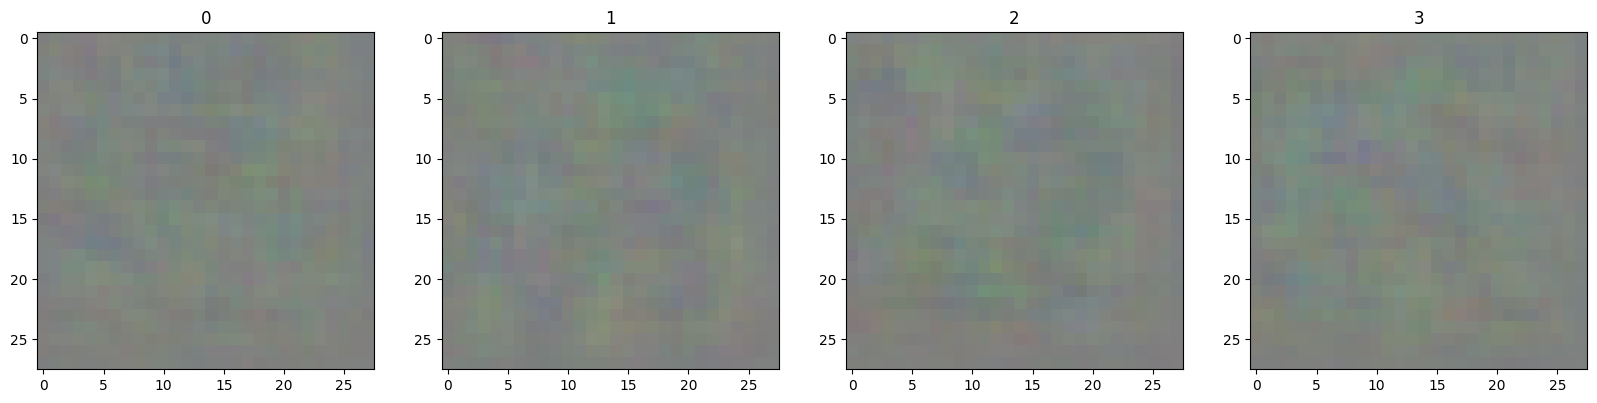

In [19]:
# Generate new fashion
img = generator.predict(np.random.randn(4,600,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [20]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [21]:
discriminator = build_discriminator()

In [22]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        2432      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [23]:
img.shape

(28, 28, 3)

In [24]:
discriminator.predict(img)

ValueError: in user code:

    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Bruno Santos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 3), found shape=(None, 28, 3)


# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [25]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [26]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [27]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [28]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((600, 600, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((600,600,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [29]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [30]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [31]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [32]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=600):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/drive/MyDrive/Bootcamp Final Project/images', f'generated_img_{epoch}_{i}.png'))

### 4.3 Train 

#### Get data

In [33]:
DATASET_PATH = "/content/drive/MyDrive/Bootcamp Final Project/hiphop (1)"
JSON_PATH = "data_covers.json"

In [34]:
from PIL import Image
def image_array(path):
    img = Image.open(path)
    image = img.resize((28, 28))
    img_array = np.array(image)
    return img_array

In [35]:
def labels(x):
    list = ["blues","classical","country", "disco", "hiphop", "jazz","metal","pop","raggae","rock"]
    for i, item in enumerate(list):
        if item in x:
            return item

In [36]:
image_paths = []
for root, directories, files in os.walk(DATASET_PATH):
    for file in files:
        image_path = os.path.join(root, file)
        image_paths.append(image_path)

In [37]:
import pandas as pd
image_df = pd.DataFrame(image_paths, columns=["Image_path"])

In [38]:
image_df

,Image_path


In [39]:
image_df["Image"]=image_df['Image_path'].apply(image_array)

In [40]:
list = ["blues","classical","country", "disco", "hiphop", "jazz","metal","pop","raggae","rock"]
image_df["labels"] = 0
image_df.head()

image_df["labels"] = image_df['Image_path'].apply(labels)

In [41]:
label_data = image_df[image_df["labels"]=="hiphop"]["labels"].values

In [42]:
image_data = image_df[image_df["labels"]=="hiphop"]["Image"].values
image_data.shape

(0,)

In [43]:
def scale_images(data):
    image = data
    return image/255

In [44]:
image_data_s = scale_images(image_data)

In [45]:
stacked_array = np.stack(image_data_s, axis=0)

ValueError: need at least one array to stack

In [ ]:
#grayscale_dataset = np.mean(stacked_array, axis=3, keepdims=True)

In [ ]:
stacked_array.shape

(600, 28, 28, 3)

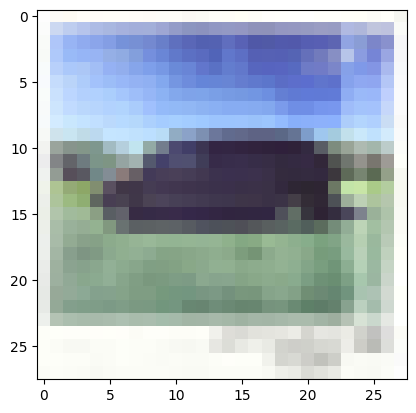

In [ ]:
plt.imshow(stacked_array[2])

## Train

In [ ]:
# Recommend 2000 epochs
hist = fashgan.fit(stacked_array, epochs=500, callbacks=[ModelMonitor()])

Epoch 1/500
 6/19 [========>.....................] - ETA: 8s - d_loss: 0.2744 - g_loss: 1.5544

19/19 [==============================] - 13s 665ms/step - d_loss: 0.2747 - g_loss: 1.5803
Epoch 2/500
19/19 [==============================] - 13s 679ms/step - d_loss: 0.2728 - g_loss: 1.6069
Epoch 3/500
19/19 [==============================] - 13s 687ms/step - d_loss: 0.2746 - g_loss: 1.6172
Epoch 4/500
19/19 [==============================] - 13s 676ms/step - d_loss: 0.2741 - g_loss: 1.6325
Epoch 5/500
19/19 [==============================] - 13s 669ms/step - d_loss: 0.2727 - g_loss: 1.6500
Epoch 6/500
19/19 [==============================] - 13s 667ms/step - d_loss: 0.2708 - g_loss: 1.6562
Epoch 7/500
19/19 [==============================] - 13s 667ms/step - d_loss: 0.2715 - g_loss: 1.6588
Epoch 8/500
19/19 [==============================] - 13s 670ms/step - d_loss: 0.2734 - g_loss: 1.6621
Epoch 9/500
19/19 [==============================] - 13s 673ms/step - d_loss: 0.2720 - g_loss: 1.6596
Epoch 10/500
19/19 [==============================] - 13s 673ms/step - d_loss: 0.2739 - g_loss

### 4.4 Review Performance

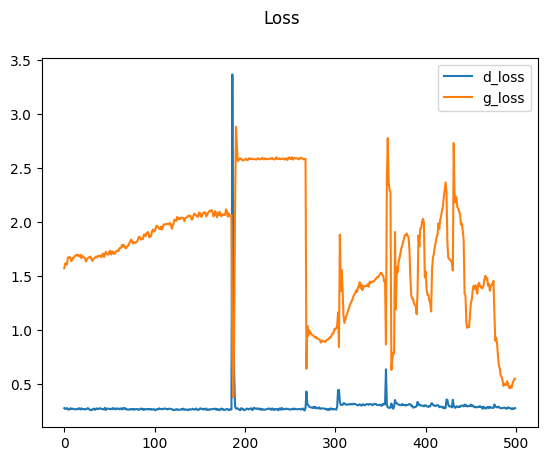

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

### 5.1 Generate Images

In [11]:
generator.load_weights(r'C:\Users\Bruno Santos\Desktop\Iron Hack - Semanas\Final Project\FINAL\Full Project\generator2.h5')

In [ ]:
n = 10

In [ ]:
n

10

In [23]:
imgs = generator.predict(tf.random.normal((20, 600, 1)))

1/1 [==============================] - 0s 97ms/step


In [24]:
imgs2 =0.90-imgs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

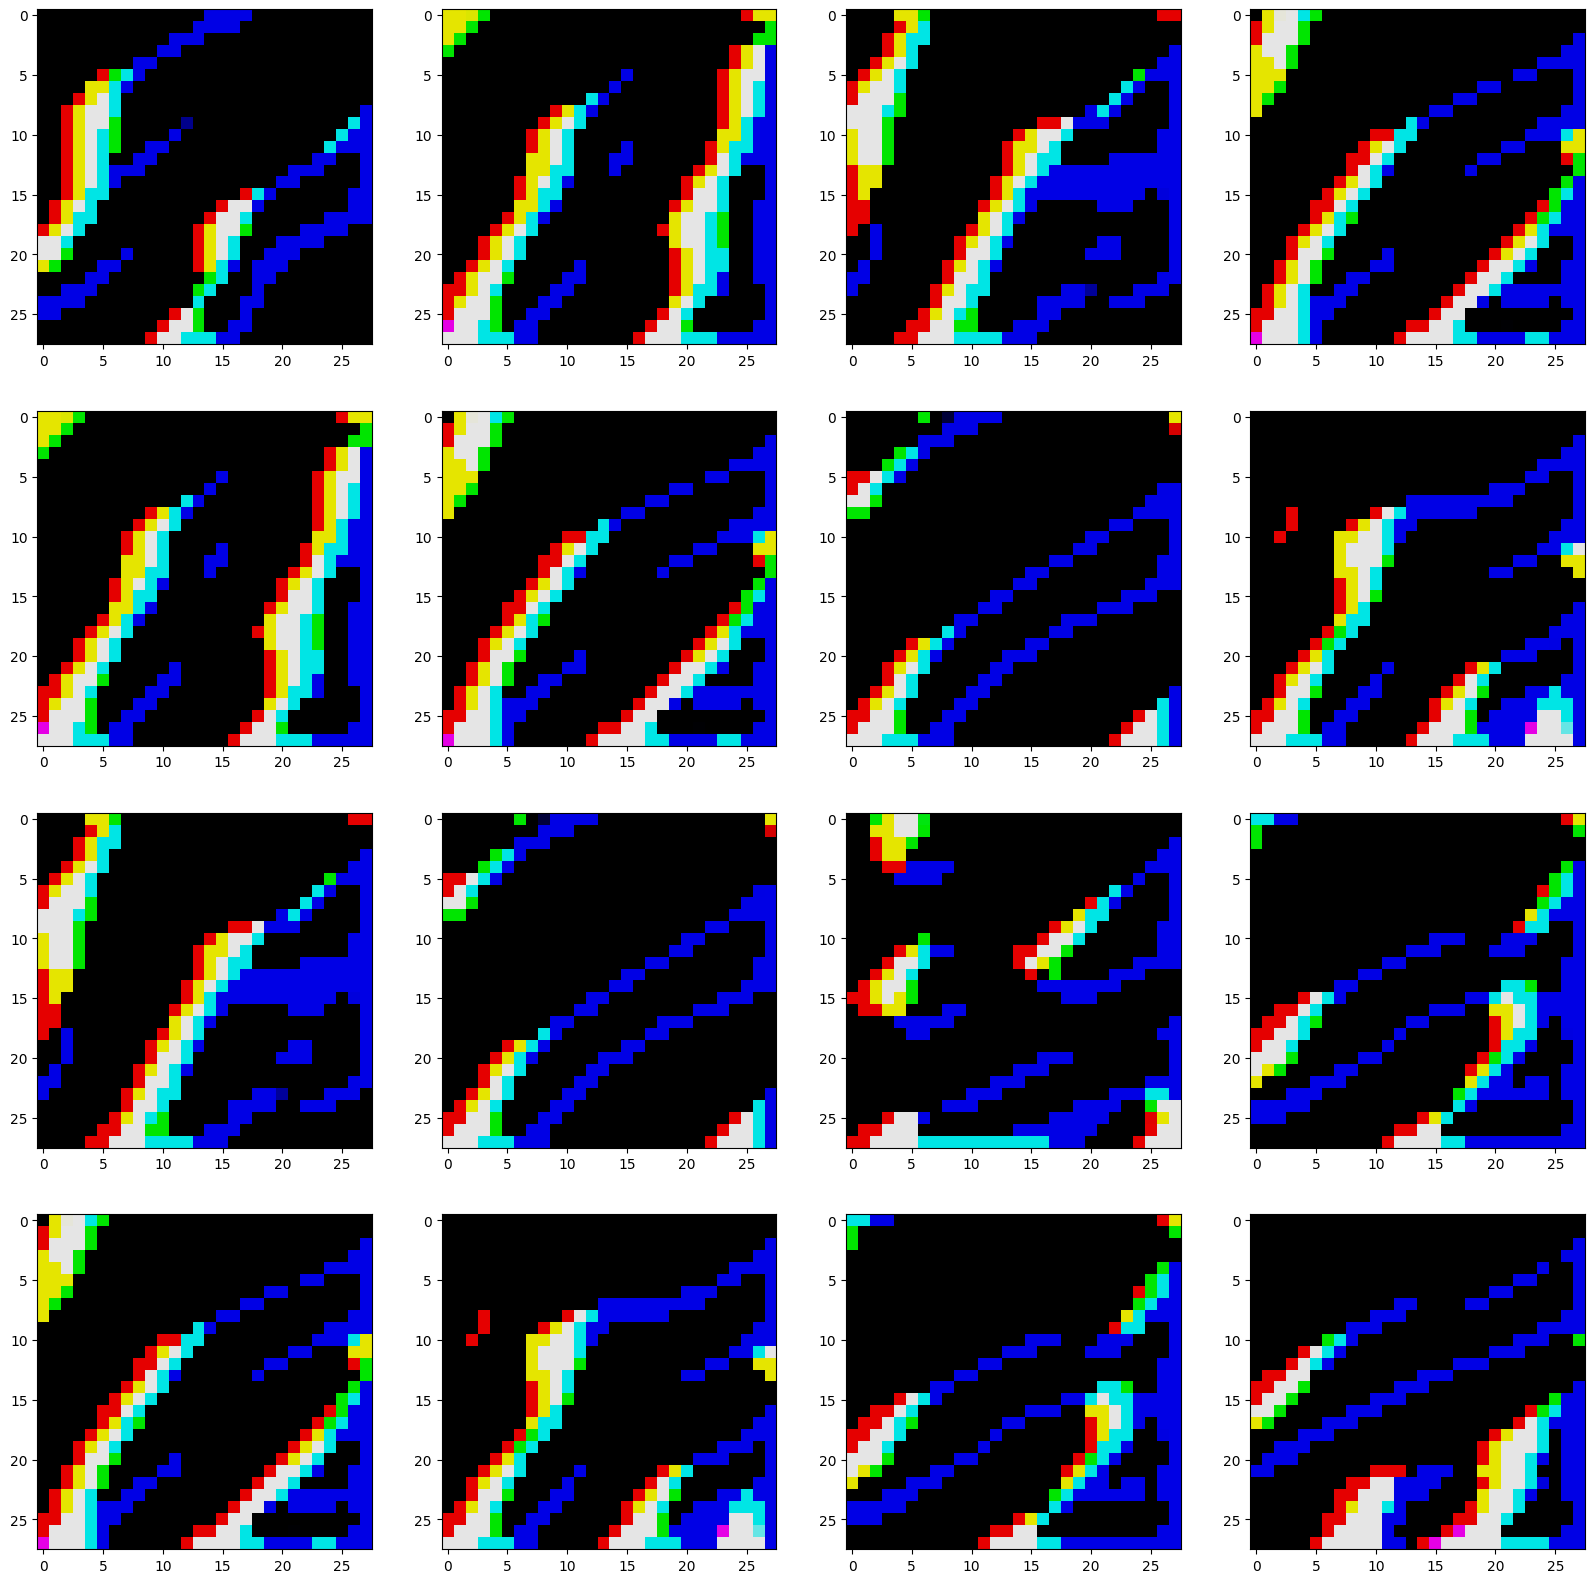

In [25]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs2[(r+1)*(c+1)-1])

### 5.2 Save the Model

In [48]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [47]:
import pickle
with open(r'C:\Users\Bruno Santos\Desktop\Iron Hack - Semanas\Final Project\FINAL\Full Project\generator.pkl', 'rb') as file:
    data = pickle.load(file)

ValueError: Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['dense/kernel:0', 'dense/bias:0']